# 결정트리 - Decision Tree
#### 이진 결정트리를 통해 정확도를 향상시킨다
#### 결정트리의 복잡도..! 설정!

#### 결정트리에서의 Overfitting을 예방방하기 위한 방법
##### 1. PrePrunning (트리생성을 도중에 중단)
##### 2. PostPrunning (트리생성 후, 데이터 포인트가 적은 노드를 삭제 or 병합)

In [14]:
from IPython.display import display
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings

warnings.simplefilter("ignore") # warning 무시하기
%matplotlib inline

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [16]:
# 완전한 트리 모델의 경우에는 기대대로 훈련 세트에서 정확도는 100%입니다. 테스트 세트의 정확도는 93.7%로 선형 모델 95%보다 살짝 낮습니다.

In [17]:
# 결정 트리의 깊이를 제한하지 않으면 깊이와 복잡도는 걷잡을 수 없이 커질 수 있습니다. 복잡도가 커지면 과대적합되기 쉬우니 이제 규제, 즉 제한이 필요합니다.

In [18]:
# DecisionTreeClassifier에서는 max_depth=4과 같이 연속된 질문 수를 최대 4회로 제한할 수 있습니다. 훈련 세트의 정확도는 떨어질 수 있지만 테스트 세트의 성능을 개선할 수 있을 것입니다.

In [19]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [20]:
# 예상대로 어느정도 과대 적합은 있지만, 테스트 세트 정확도가 개선된 것을 확인할 수 있습니다.

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

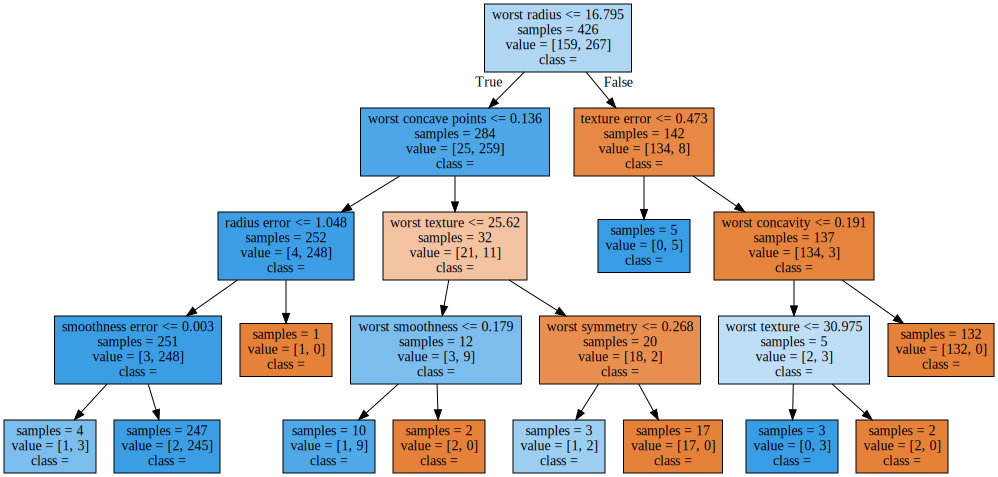

'tree.png'

In [22]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# dot 파일 이미지로 저장하기
dot = graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree')


# 트리의 특성 중요도
#### 위에서 말했듯이 깊이가 깊어지면 트리를 전체적으로 살피는 것은 어려울 수 있습니다. 
#### 대신 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있습니다. 
#### 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(feature importance) 입니다. 
#### 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않음을 1을 완벽하게 타깃 클래스를 예측했다는 뜻입니다. 그렇게 특성 중요도의 전체 합은 1입니다.

In [23]:
print("feature importance : \n {}".format(tree.feature_importances_))

feature importance : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


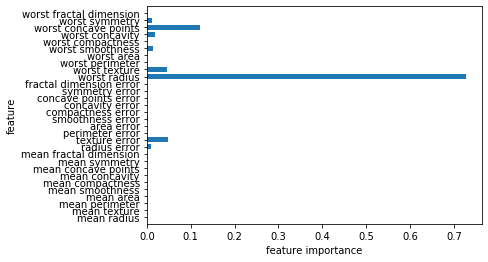

In [24]:
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [25]:
# 트리에서 첫번째 노드에서 사용되는 요소인 worst radius 값이 가장 크게 나타납니다. 

# 회귀에서의 결정트리!

In [29]:
# 회귀에서도 결정 트리는 유용하게 사용할 수 있습니다. 
# DecisionTreeRegressor에서는 위에서 사용한 분류와 비슷하게 회귀 문제에 적용할 수 있습니다. 
# 하지만 여기서는 외삽(extrapolation), 즉 훈련 데이터의 범위 밖 포인트에 대해 예측을 할 수 없습니다.

Text(0, 0.5, 'price ($/Mbyte)')

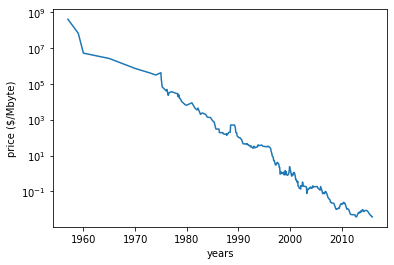

In [30]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

# 로그 스케일로 그래프 그리기
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("years")
plt.ylabel("price ($/Mbyte)")

In [37]:
# tree를 이용한 부분에서 훈련 범위를 벗어날 경우 예측이 이상해진다;;!

# tree의 단점!

# 장단점과 매개변수
#### 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수입니다.

#### 결정 트리가 이전에 소개한 다른 알고리즘들보다 나은 점은 두 가지입니다.

##### 만들어진 모델을 쉽게 시각화할 수 있습니다. 이는 비전문가에게 설명하기 쉽고, 이해하기 쉽습니다.
##### 데이터 스케일의 영향을 받지 않습니다. 그러므로 전처리(정규화, 표준화)가 필요 없습니다.

#### 주요 단점은 과대적합되는 경향이 있어 일반화 성능이 좋지 않다는 것입니다. 그래서 다음에 설명할 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용합니다.

In [38]:
# -> 결정트리의 단점인 과대적합을 피하기 위한 방법!

# Random Forest!

### 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음입니다.

In [39]:
# 잘 작동하되 서로 다른 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과의 평균을 사용하여 과대적합 양을 줄이는 것이 메인 아이디어입니다. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명되었습니다.

In [40]:
# 그렇다면 이제 해결해야하는 문제는 2개입니다. 
#잘 작동하는 결정 트리를 많이 만드는 것과 그것들의 방향성이 다양해야한다는 것입니다. 
#랜덤 포레스트는 이름에서도 알 수 있듯이 트리를 랜덤으로 만듭니다. 
#랜덤으로 만드는 방법은 두 가지입니다.

## 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택
## 분할 테스트에서 특성을 무작위로 선택

In [43]:
# 이전에 사용했던 데이터셋 two_moons에서 5개의 트리를 이용한 랜덤 포레스트를 만들어봅시다.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

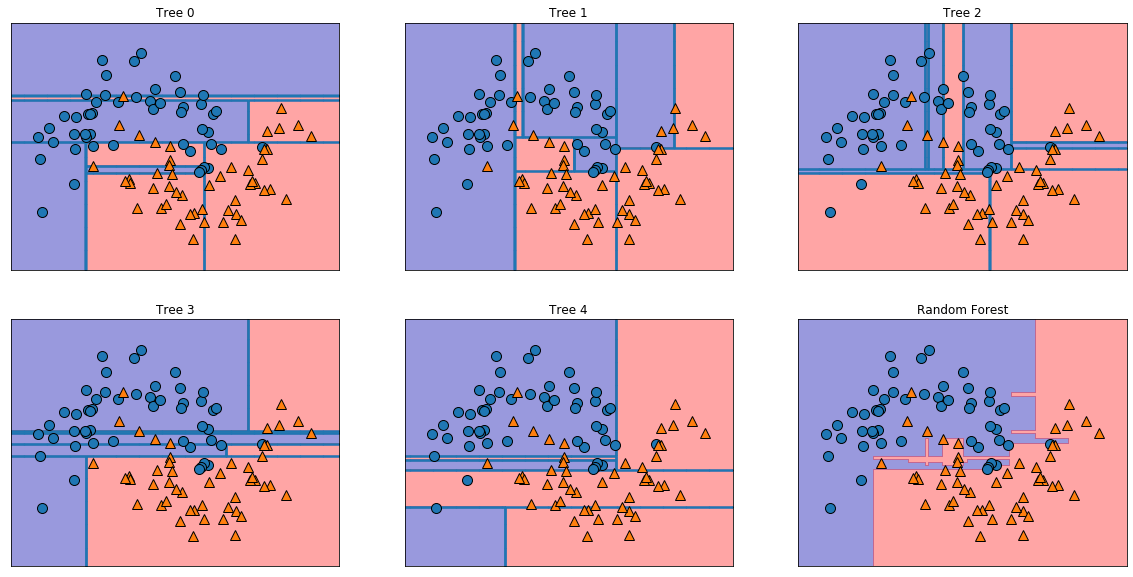

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("train set acc: {:.3f}".format(forest.score(X_train, y_train)))
print("test set acc: {:.3f}".format(forest.score(X_test, y_test)))
# train set acc: 1.000
# test set acc: 0.972

train set acc: 1.000
test set acc: 0.972


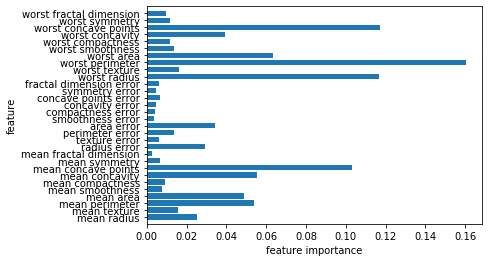

In [49]:
plot_feature_importances_cancer(forest)

# 그래디언트 부스팅 회귀 트리

## -> 특징
## -> 회귀와 분류 모두에 사용할 수 있다!

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
# 훈련 세트 정확도: 1.000
# 테스트 세트 정확도: 0.958


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [52]:
# 기본값에서는 훈련 세트에서 100%인것으로 보아 과대적합되어 있음을 알 수 있습니다. 최대 깊이를 줄이거나 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있습니다.

In [54]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [56]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


In [57]:
# 학습률을 낮추는 것보다는 깊이를 낮추는 것으로 모델 성능을 향상 시켰습니다. 다른 결정 트리 기반의 모델처럼 특성 중요도를 시각화해보겠습니다.

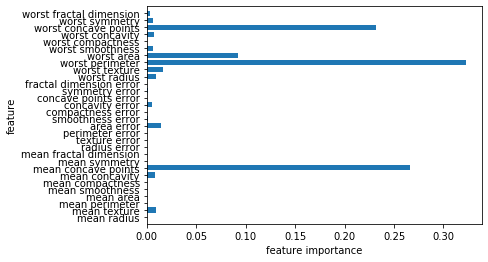

In [58]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# 2.3.7 커널 서포트 벡터 머신

In [62]:
# 선형 모델과 비선형 특성
# 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적입니다. 

#선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것입니다.
# 인위적 데이터에서 살펴봅시다.



Text(0, 0.5, 'feature 1')

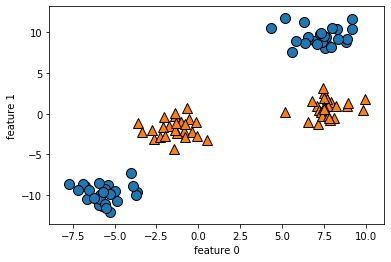

In [72]:
from sklearn.datasets import make_blobs


X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

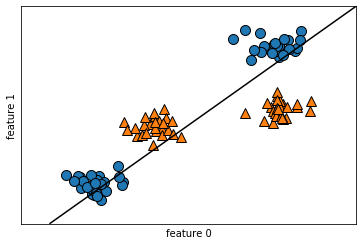

In [73]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")


In [74]:
#두 번째 특성을 제곱한 특성 1 ** 2 를 추가해 특성을 확장해보겠습니다. 이제 2차원에서 3차원으로 데이터가 확장되었습니다. 이 데이터셋을 3차원 산점도로 나타내봅시다.

No handles with labels found to put in legend.


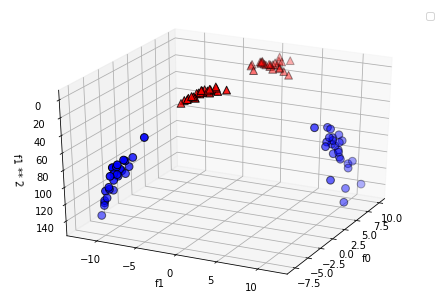

In [75]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("f0")
ax.set_ylabel("f1")
ax.set_zlabel("f1 ** 2")
ax.legend()
plt.show()

Text(0.5, 0, 'f1 ** 2')

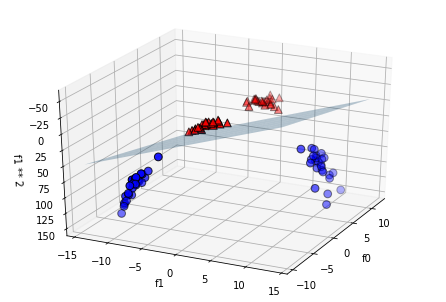

In [76]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("f0")
ax.set_ylabel("f1")
ax.set_zlabel("f1 ** 2")

Text(0, 0.5, 'feature 1')

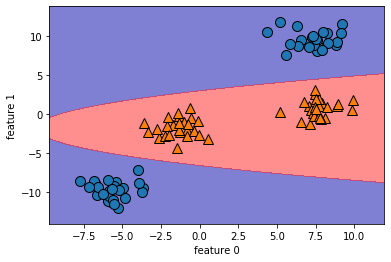

In [78]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")


Text(0, 0.5, 'feature 1')

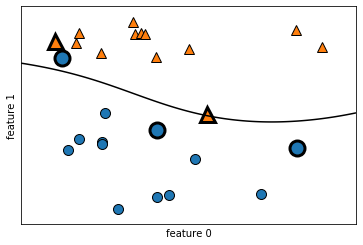

In [80]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()      
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [82]:
# 이 그림에서 SVM은 매우 부드럽고 비선형 경계를 만들었습니다. 
# 여기서 사용한 매개변수 C와 gamma에 대해 알아보겠습니다.

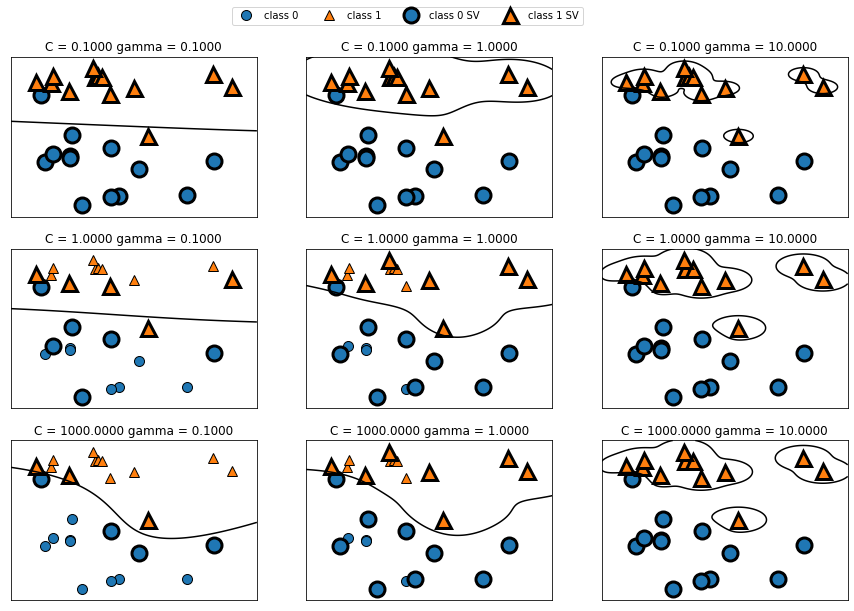

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 SV", "class 1 SV"], ncol=4, loc=(.9, 1.2))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'feature size')

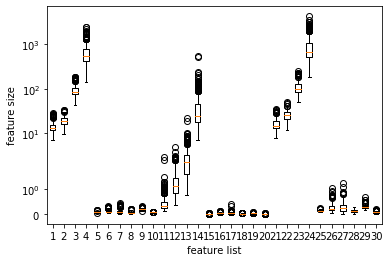

In [86]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")

In [88]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최댓값\n {}".format(X_train_scaled.max(axis=0)))
# 특성별 최솟값
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0. 0.]
# 특성별 최댓값
# [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
#  1. 1. 1. 1. 1. 1.]

# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))
# 훈련 세트 정확도: 0.948
# 테스트 세트 정확도: 0.951

svc = SVC(gamma='auto', C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

특성별 최솟값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [89]:
# 데이터 스케일을 조정하고 적당하게 매개변수를 설정한 결과 97%까지 성능이 향상된 것을 확인할 수 있습니다.